# Effectiveness at Covering Code and Efficiency at Guiding Executions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Random functions

Load Evaluation Data

In [ ]:
random_functions_df = pd.read_csv('../../metrics/metrics_random_functions_dataset.csv')
random_functions_df

,Unnamed: 0,file,predictor,covered_iids,total_uses,guided_uses,executed_lines,covered_lines,execution_time,random_predictions,type4py_predictions,execution
0,1980.0,./popular_projects_snippets_dataset/black/bodi...,NaiveValuePredictor,5.0,5.0,4.0,1.0,1.0,0.008624,NaN,NaN,NaN
1,1981.0,./popular_projects_snippets_dataset/black/bodi...,NaiveValuePredictor,4.0,4.0,3.0,0.0,0.0,0.000794,NaN,NaN,NaN
2,1982.0,./popular_projects_snippets_dataset/black/bodi...,NaiveValuePredictor,3.0,3.0,3.0,0.0,0.0,0.000494,NaN,NaN,NaN
3,1983.0,./popular_projects_snippets_dataset/black/bodi...,NaiveValuePredictor,3.0,3.0,2.0,0.0,0.0,0.000748,NaN,NaN,NaN
4,1984.0,./popular_projects_snippets_dataset/black/bodi...,NaiveValuePredictor,2.0,2.0,2.0,1.0,1.0,0.006085,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11328,NaN,./popular_projects_snippets_dataset/flask/bodi...,CodeBERTValuePredictor_fine_grained,5.0,5.0,5.0,1.0,1.0,0.848552,0.0,0.0,1.0
11329,NaN,./popular_projects_snippets_dataset/pandas/bod...,CodeBERTValuePredictor_fine_grained,4.0,4.0,1.0,2.0,2.0,0.606373,0.0,0.0,1.0
11330,NaN,./popular_projects_snippets_dataset/black/bodi...,CodeBERTValuePredictor_fine_grained,5.0,5.0,4.0,1.0,1.0,0.666149,0.0,0.0,1.0
11331,NaN,./popular_projects_snippets_dataset/flask/bodi...,CodeBERTValuePredictor_fine_grained,8.0,8.0,2.0,0.0,0.0,0.488150,0.0,0.0,1.0


In [ ]:
random_functions_total_lines_df = pd.read_csv('../../total_lines_random_functions_dataset.csv')
random_functions_total_lines_df

,file,total_lines
0,./popular_projects_snippets_dataset/black/bodi...,17
1,./popular_projects_snippets_dataset/black/bodi...,2
2,./popular_projects_snippets_dataset/black/bodi...,8
3,./popular_projects_snippets_dataset/black/bodi...,2
4,./popular_projects_snippets_dataset/black/bodi...,8
...,...,...
995,./popular_projects_snippets_dataset/tensorflow...,2
996,./popular_projects_snippets_dataset/tensorflow...,1
997,./popular_projects_snippets_dataset/tensorflow...,7
998,./popular_projects_snippets_dataset/tensorflow...,3


In [ ]:
random_functions_As_Is_df = random_functions_df[random_functions_df['predictor'] == 'AsIs']
files_with_results_As_Is = random_functions_As_Is_df.file.unique()
files_without_results_As_Is = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_As_Is)]

random_functions_Naive_df = random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']
files_with_results_Naive = random_functions_Naive_df.file.unique()
files_without_results_Naive = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Naive)]

random_functions_Random_df = random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']
files_with_results_Random = random_functions_Random_df.file.unique()
files_without_results_Random = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Random)]

random_functions_Type4Py_df = random_functions_df[random_functions_df['predictor'] == 'Type4PyValuePredictor']
files_with_results_Type4Py = random_functions_Type4Py_df.file.unique()
files_without_results_Type4Py = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Type4Py)]

random_functions_Type4Py_df_ = random_functions_df[random_functions_df['predictor'] == 'Type4PyValuePredictor*']
files_with_results_Type4Py_ = random_functions_Type4Py_df_.file.unique()
files_without_results_Type4Py_ = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Type4Py_)]

random_functions_Frequency_df = random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']
files_with_results_Frequency = random_functions_Frequency_df.file.unique()
files_without_results_Frequency = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Frequency)]

random_functions_Fine_Grained_df = random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']
files_with_results_Fine_Grained = random_functions_Fine_Grained_df.file.unique()
files_without_results_Fine_Grained = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Fine_Grained)]

random_functions_Deterministic_df = random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']
files_with_results_Deterministic = random_functions_Deterministic_df.file.unique()
files_without_results_Deterministic = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Deterministic)]

random_functions_Randomized_df = random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']
files_with_results_Randomized = random_functions_Randomized_df.file.unique()
files_without_results_Randomized = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Randomized)]

random_functions_Pynguin_df = random_functions_df[random_functions_df['predictor'] == 'PynguinTests']
files_with_results_Pynguin = random_functions_Pynguin_df.file.unique()
files_without_results_Pynguin = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_Pynguin)]


random_functions_CodeBERT_Fine_Grained_df = random_functions_df[random_functions_df['predictor'] == 'CodeBERTValuePredictor_fine_grained']
files_with_results_CodeBERT_Fine_Grained = random_functions_CodeBERT_Fine_Grained_df.file.unique()
files_without_results_CodeBERT_Fine_Grained = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_CodeBERT_Fine_Grained)]

random_functions_CodeBERT_Deterministic_df = random_functions_df[random_functions_df['predictor'] == 'CodeBERTValuePredictor_coarse_grained_deterministic']
files_with_results_CodeBERT_Deterministic = random_functions_CodeBERT_Deterministic_df.file.unique()
files_without_results_CodeBERT_Deterministic = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_CodeBERT_Deterministic)]

random_functions_CodeBERT_Randomized_df = random_functions_df[random_functions_df['predictor'] == 'CodeBERTValuePredictor_coarse_grained_randomized']
files_with_results_CodeBERT_Randomized = random_functions_CodeBERT_Randomized_df.file.unique()
files_without_results_CodeBERT_Randomized = random_functions_total_lines_df[~random_functions_total_lines_df['file'].isin(files_with_results_CodeBERT_Randomized)]

In [ ]:
files_without_results_As_Is = files_without_results_As_Is
files_without_results_As_Is['predictor'] = 'AsIs'
files_without_results_As_Is['covered_iids'] = 0
files_without_results_As_Is['total_uses'] = 0
files_without_results_As_Is['guided_uses'] = 0
files_without_results_As_Is['executed_lines'] = 0
files_without_results_As_Is['covered_lines'] = 0
files_without_results_As_Is['execution_time'] = 0

files_without_results_Naive = files_without_results_Naive
files_without_results_Naive['predictor'] = 'NaiveValuePredictor'
files_without_results_Naive['covered_iids'] = 0
files_without_results_Naive['total_uses'] = 0
files_without_results_Naive['guided_uses'] = 0
files_without_results_Naive['executed_lines'] = 0
files_without_results_Naive['covered_lines'] = 0
files_without_results_Naive['execution_time'] = 0

files_without_results_Random = files_without_results_Random
files_without_results_Random['predictor'] = 'RandomPredictor'
files_without_results_Random['covered_iids'] = 0
files_without_results_Random['total_uses'] = 0
files_without_results_Random['guided_uses'] = 0
files_without_results_Random['executed_lines'] = 0
files_without_results_Random['covered_lines'] = 0
files_without_results_Random['execution_time'] = 0

files_without_results_Type4Py = files_without_results_Type4Py
files_without_results_Type4Py['predictor'] = 'Type4PyValuePredictor'
files_without_results_Type4Py['covered_iids'] = 0
files_without_results_Type4Py['total_uses'] = 0
files_without_results_Type4Py['guided_uses'] = 0
files_without_results_Type4Py['executed_lines'] = 0
files_without_results_Type4Py['covered_lines'] = 0
files_without_results_Type4Py['execution_time'] = 0

files_without_results_Frequency = files_without_results_Frequency
files_without_results_Frequency['predictor'] = 'FrequencyValuePredictor'
files_without_results_Frequency['covered_iids'] = 0
files_without_results_Frequency['total_uses'] = 0
files_without_results_Frequency['guided_uses'] = 0
files_without_results_Frequency['executed_lines'] = 0
files_without_results_Frequency['covered_lines'] = 0
files_without_results_Frequency['execution_time'] = 0

files_without_results_Fine_Grained = files_without_results_Fine_Grained
files_without_results_Fine_Grained['predictor'] = 'CodeT5ValuePredictor_fine_grained'
files_without_results_Fine_Grained['covered_iids'] = 0
files_without_results_Fine_Grained['total_uses'] = 0
files_without_results_Fine_Grained['guided_uses'] = 0
files_without_results_Fine_Grained['executed_lines'] = 0
files_without_results_Fine_Grained['covered_lines'] = 0
files_without_results_Fine_Grained['execution_time'] = 0

files_without_results_Deterministic = files_without_results_Deterministic
files_without_results_Deterministic['predictor'] = 'CodeT5ValuePredictor_coarse_grained_deterministic'
files_without_results_Deterministic['covered_iids'] = 0
files_without_results_Deterministic['total_uses'] = 0
files_without_results_Deterministic['guided_uses'] = 0
files_without_results_Deterministic['executed_lines'] = 0
files_without_results_Deterministic['covered_lines'] = 0
files_without_results_Deterministic['execution_time'] = 0

files_without_results_Randomized = files_without_results_Randomized
files_without_results_Randomized['predictor'] = 'CodeT5ValuePredictor_coarse_grained_randomized'
files_without_results_Randomized['covered_iids'] = 0
files_without_results_Randomized['total_uses'] = 0
files_without_results_Randomized['guided_uses'] = 0
files_without_results_Randomized['executed_lines'] = 0
files_without_results_Randomized['covered_lines'] = 0
files_without_results_Randomized['execution_time'] = 0

files_without_results_Pynguin = files_without_results_Pynguin
files_without_results_Pynguin['predictor'] = 'PynguinTests'
files_without_results_Pynguin['covered_iids'] = 0
files_without_results_Pynguin['total_uses'] = 0
files_without_results_Pynguin['guided_uses'] = 0
files_without_results_Pynguin['executed_lines'] = 0
files_without_results_Pynguin['covered_lines'] = 0
files_without_results_Pynguin['execution_time'] = 0

files_without_results_CodeBERT_Fine_Grained = files_without_results_CodeBERT_Fine_Grained
files_without_results_CodeBERT_Fine_Grained['predictor'] = 'CodeBERTValuePredictor_fine_grained'
files_without_results_CodeBERT_Fine_Grained['covered_iids'] = 0
files_without_results_CodeBERT_Fine_Grained['total_uses'] = 0
files_without_results_CodeBERT_Fine_Grained['guided_uses'] = 0
files_without_results_CodeBERT_Fine_Grained['executed_lines'] = 0
files_without_results_CodeBERT_Fine_Grained['covered_lines'] = 0
files_without_results_CodeBERT_Fine_Grained['execution_time'] = 0

files_without_results_CodeBERT_Deterministic = files_without_results_CodeBERT_Deterministic
files_without_results_CodeBERT_Deterministic['predictor'] = 'CodeBERTValuePredictor_coarse_grained_deterministic'
files_without_results_CodeBERT_Deterministic['covered_iids'] = 0
files_without_results_CodeBERT_Deterministic['total_uses'] = 0
files_without_results_CodeBERT_Deterministic['guided_uses'] = 0
files_without_results_CodeBERT_Deterministic['executed_lines'] = 0
files_without_results_CodeBERT_Deterministic['covered_lines'] = 0
files_without_results_CodeBERT_Deterministic['execution_time'] = 0

files_without_results_CodeBERT_Randomized = files_without_results_CodeBERT_Randomized
files_without_results_CodeBERT_Randomized['predictor'] = 'CodeBERTValuePredictor_coarse_grained_randomized'
files_without_results_CodeBERT_Randomized['covered_iids'] = 0
files_without_results_CodeBERT_Randomized['total_uses'] = 0
files_without_results_CodeBERT_Randomized['guided_uses'] = 0
files_without_results_CodeBERT_Randomized['executed_lines'] = 0
files_without_results_CodeBERT_Randomized['covered_lines'] = 0
files_without_results_CodeBERT_Randomized['execution_time'] = 0


In [ ]:
random_functions_df = random_functions_df.merge(random_functions_total_lines_df, how='left', on='file')

In [ ]:
random_functions_df = pd.concat([random_functions_df, files_without_results_As_Is])
random_functions_df = pd.concat([random_functions_df, files_without_results_Naive])
random_functions_df = pd.concat([random_functions_df, files_without_results_Random])
random_functions_df = pd.concat([random_functions_df, files_without_results_Type4Py])
random_functions_df = pd.concat([random_functions_df, files_without_results_Frequency])
random_functions_df = pd.concat([random_functions_df, files_without_results_Fine_Grained])
random_functions_df = pd.concat([random_functions_df, files_without_results_Deterministic])
random_functions_df = pd.concat([random_functions_df, files_without_results_Randomized])
random_functions_df = pd.concat([random_functions_df, files_without_results_Pynguin])
random_functions_df = pd.concat([random_functions_df, files_without_results_CodeBERT_Fine_Grained])
random_functions_df = pd.concat([random_functions_df, files_without_results_CodeBERT_Deterministic])
random_functions_df = pd.concat([random_functions_df, files_without_results_CodeBERT_Randomized])

In [ ]:
random_functions_df['covered_lines_percentage'] = random_functions_df['covered_lines'] / random_functions_df['total_lines']
random_functions_df['line_execution_time'] = random_functions_df['execution_time'] / random_functions_df['executed_lines']
random_functions_df['completely_executed'] = random_functions_df['total_lines'] - random_functions_df['covered_lines']
random_functions_df['completely_executed'] = [1 if value <= 0.5 else 0 for value in random_functions_df['completely_executed']]
random_functions_df.replace([np.inf, -np.inf], 0, inplace=True)

Overall Comparisson

In [ ]:
random_functions_df_grouped = random_functions_df.groupby(by="predictor", as_index=False)[["covered_iids","total_uses","guided_uses","covered_lines","completely_executed", "execution_time"]].sum()
random_functions_df_grouped
random_functions_df_grouped['Approach'] = ['As Is', 'CodeBERT CG \n(deterministic)', 'CodeBERT CG \n(randomized)', 'CodeBERT FG', 'CodeT5 CG \n(deterministic)', 'CodeT5 CG \n(randomized)', 'CodeT5 FG', 'Frequency', 'Naive', 'Pynguin Tests', 'Random', 'Type4Py']
random_functions_df_grouped['order'] = [0, 7 , 6, 8, 10, 9, 11, 5, 2, 1, 3, 4]
random_functions_df_grouped

,predictor,covered_iids,total_uses,guided_uses,covered_lines,completely_executed,execution_time,Approach,order
0,AsIs,1218.0,1218.00,0.000,154.0,19,2.414686,As Is,0
1,CodeBERTValuePredictor_coarse_grained_determin...,9871.0,19452.00,11032.000,2096.0,357,1096.386363,CodeBERT CG \n(deterministic),7
2,CodeBERTValuePredictor_coarse_grained_randomized,9391.0,15308.00,8734.000,2007.0,351,1033.035890,CodeBERT CG \n(randomized),6
3,CodeBERTValuePredictor_fine_grained,9433.0,9645.00,5742.000,1996.0,335,1026.955067,CodeBERT FG,8
4,CodeT5ValuePredictor_coarse_grained_deterministic,9697.0,22936.00,12997.000,2031.0,347,341.748196,CodeT5 CG \n(deterministic),10
5,CodeT5ValuePredictor_coarse_grained_randomized,9306.0,11417.00,6604.000,1974.0,341,334.537315,CodeT5 CG \n(randomized),9
6,CodeT5ValuePredictor_fine_grained,9591.0,16859.00,9781.000,2019.0,340,439.997213,CodeT5 FG,11
7,FrequencyValuePredictor,5467.0,8004.25,4924.825,782.3,137,27.172463,Frequency,5
8,NaiveValuePredictor,4229.0,4231.00,2976.000,426.0,74,5.088755,Naive,2
9,PynguinTests,0.0,0.00,0.000,233.0,18,67.778833,Pynguin Tests,1


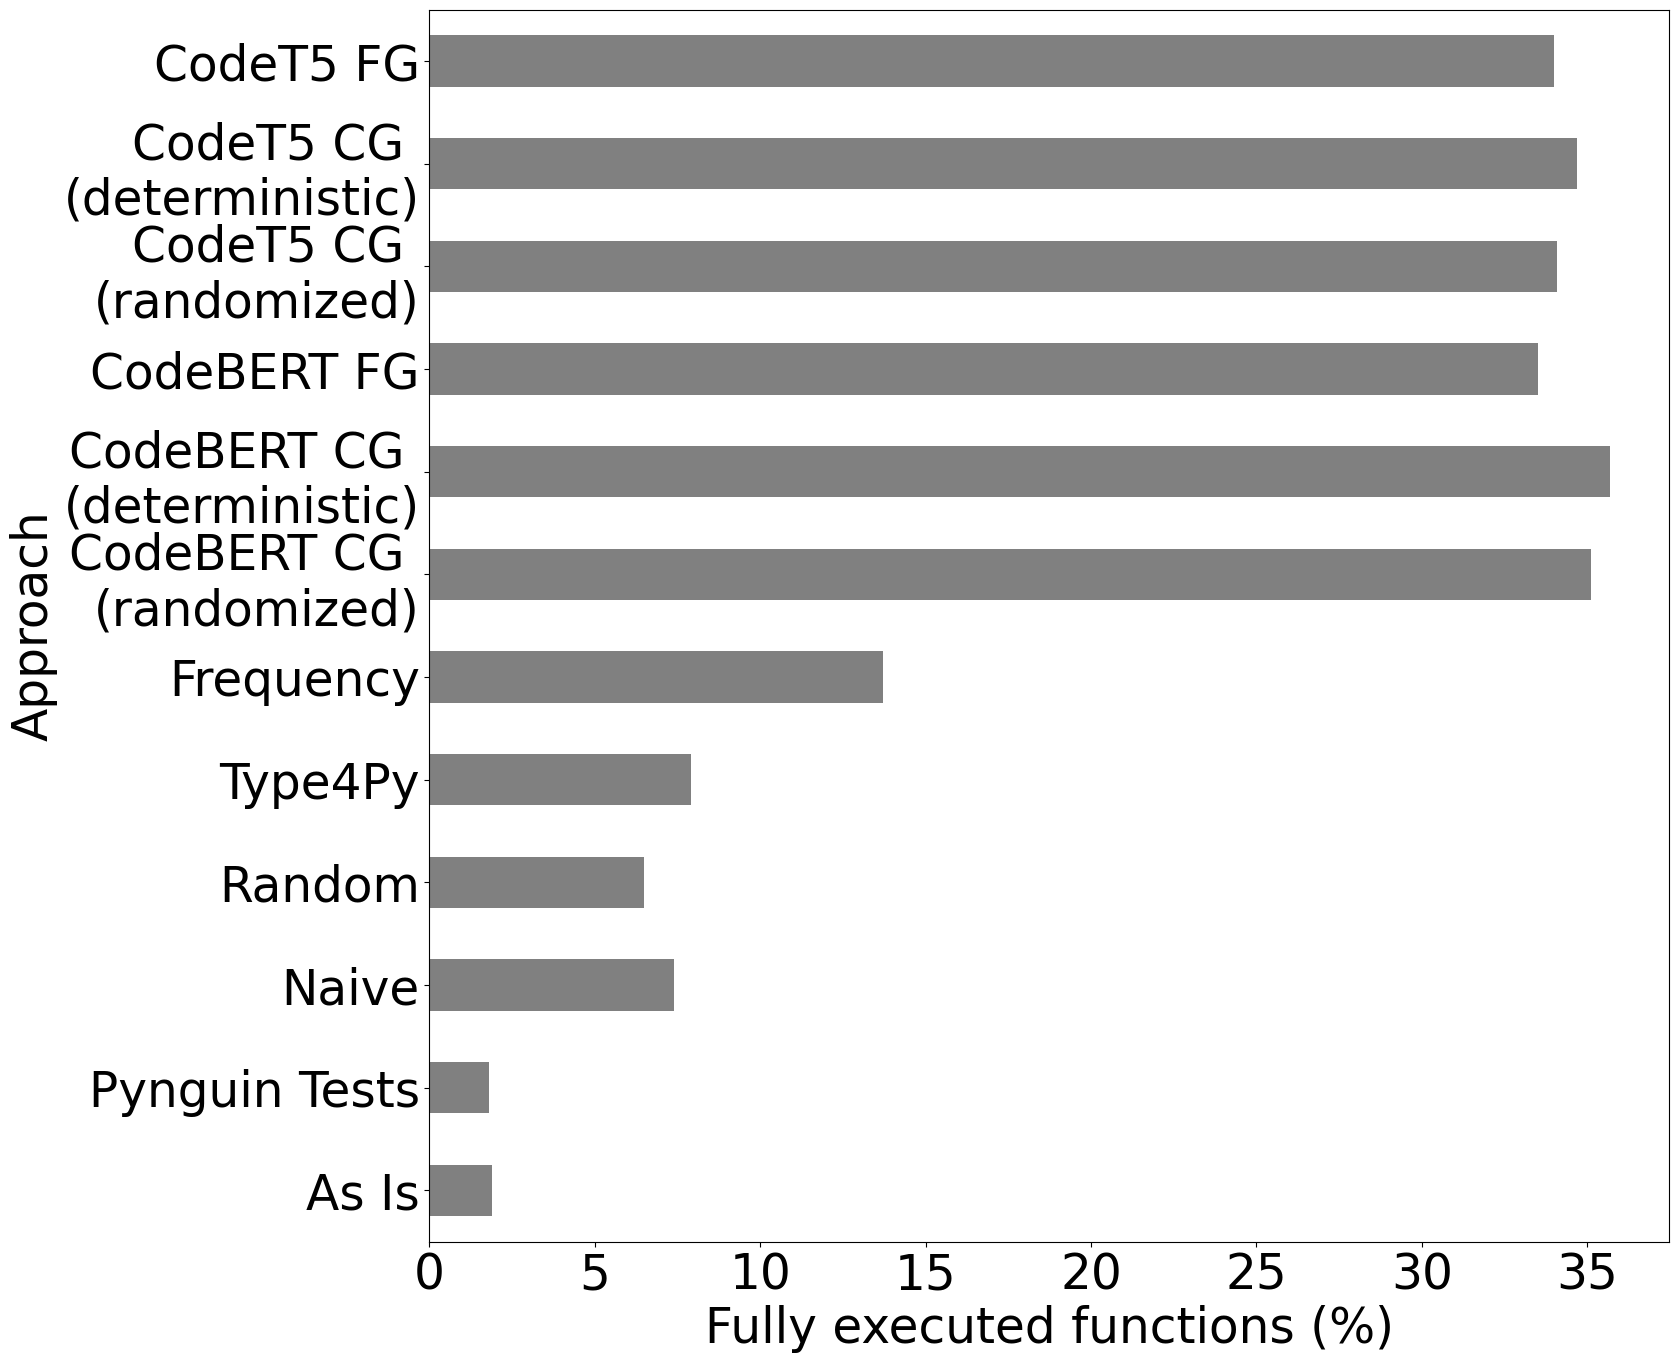

In [ ]:
random_functions_df_grouped = random_functions_df_grouped.sort_values(by=['order'])
random_functions_df_grouped['completely_executed'] = [x * 100 for x in random_functions_df_grouped['completely_executed'] / 1000]

#plt.figure(figsize=(60,6))
random_functions_df_grouped.plot.barh(x='Approach', y=['completely_executed'], color='gray', legend=None)
plt.rcParams.update({'font.size': 35})
#plt.rcParams["figure.figsize"] = (15,15)
plt.xlabel("Fully executed functions (%)")
plt.gcf().set_size_inches(16, 16)
plt.savefig("fcts_dataset_full_LC.pdf", bbox_inches = "tight")

In [ ]:
random_functions_df_grouped["covered_lines_percentage_"] = random_functions_df_grouped["covered_lines"] / [random_functions_total_lines_df['total_lines'].sum() for e in random_functions_df_grouped["covered_lines"]]
random_functions_df_grouped["execution_time_percentage_"] = random_functions_df_grouped["execution_time"] / random_functions_df_grouped["covered_lines"]

### Main results

In [ ]:
random_functions_df_grouped = random_functions_df.groupby(by="predictor")[["covered_lines_percentage", "completely_executed", "line_execution_time"]].mean()
random_functions_df_grouped

,covered_lines_percentage,completely_executed,line_execution_time
predictor,,,
AsIs,0.040729,0.019,0.001498
CodeBERTValuePredictor_coarse_grained_deterministic,0.516397,0.357,0.479893
CodeBERTValuePredictor_coarse_grained_randomized,0.503103,0.351,0.438640
CodeBERTValuePredictor_fine_grained,0.495721,0.335,0.464833
CodeT5ValuePredictor_coarse_grained_deterministic,0.504889,0.347,0.142829
CodeT5ValuePredictor_coarse_grained_randomized,0.494121,0.341,0.149108
CodeT5ValuePredictor_fine_grained,0.498525,0.340,0.178694
FrequencyValuePredictor,0.226274,0.137,0.007592
NaiveValuePredictor,0.127589,0.074,0.003617


In [ ]:
random_functions_df_covered_lines_per_predictor = pd.DataFrame()
random_functions_df_covered_lines_per_predictor['As Is'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'AsIs']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['Pynguin Tests'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'PynguinTests']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['Naive'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['Random'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['Type4Py'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'Type4PyValuePredictor']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['Frequency'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['CodeBERT CG \n(randomized)'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'CodeBERTValuePredictor_coarse_grained_randomized']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['CodeBERT CG \n(deterministic)'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'CodeBERTValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['CodeBERT FG'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'CodeBERTValuePredictor_fine_grained']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['CodeT5 CG \n(randomized)'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['CodeT5 CG \n(deterministic)'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'].tolist()]
random_functions_df_covered_lines_per_predictor['CodeT5 FG'] = [x * 100 for x in random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'].tolist()]

<Figure size 3600x600 with 0 Axes>

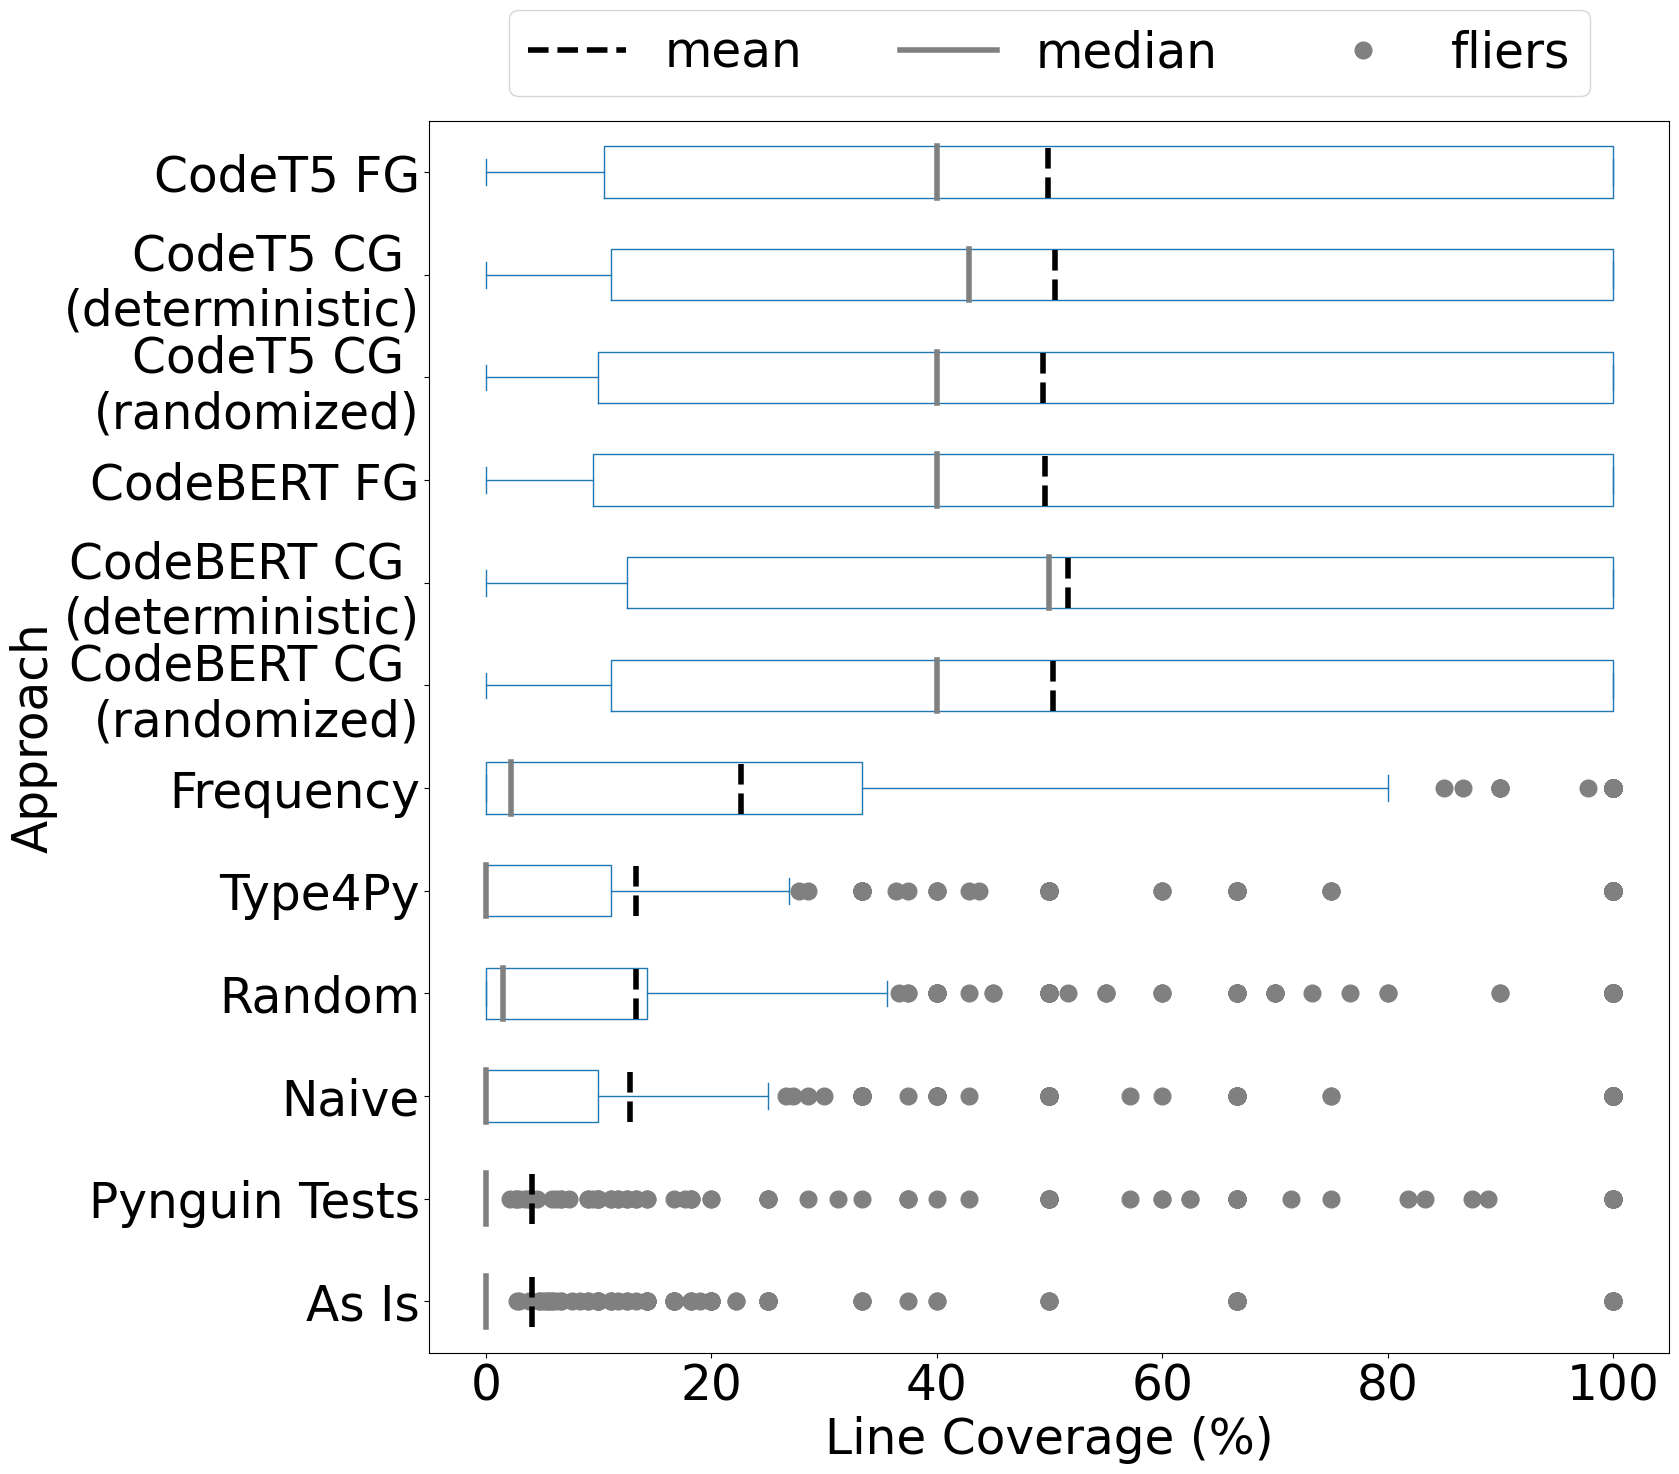

In [ ]:
meanlineprops = dict(linestyle='--', linewidth=4, color='black')
medianlineprops = dict(linestyle='-', linewidth=4, color='gray')
flierprops = dict(marker='o',markerfacecolor='gray', markersize=12,
                  linestyle='none', markeredgecolor='gray')

plt.figure(figsize=(36,6))
random_functions_df_covered_lines_per_predictor.plot.box(
    showmeans=True, meanprops=meanlineprops, meanline=True,
    medianprops=medianlineprops,
    vert=0,
    flierprops=flierprops);

#plt.rcParams.update({'font.size': 35})
plt.rcParams["figure.figsize"] = (15,15)
plt.xlabel("Line Coverage (%)")
plt.ylabel("Approach")
plt.plot([], [], '--', linewidth=4, color='black', label='mean')
plt.plot([], [], '-', linewidth=4, color='gray', label='median')
plt.plot([], [], 'o', markersize=12, color='gray', label='fliers')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.11), ncol=3)
plt.gcf().set_size_inches(16, 16)
plt.savefig("fcts_dataset_LC.pdf", bbox_inches = "tight")

AsIs vs others

In [ ]:
import scipy.stats as stats
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'AsIs']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'AsIs']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'AsIs']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'AsIs']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'AsIs']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'AsIs']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

Naive vs others

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

Random vs others

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

Frequency vs others

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

CodeT5ValuePredictor_coarse_grained_deterministic vs others

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

CodeT5ValuePredictor_coarse_grained_randomized vs others

In [ ]:
stats.wilcoxon(random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'], random_functions_df[random_functions_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

## SO snippets

Load Evaluation Data

In [ ]:
so_snippets_df = pd.read_csv('../../metrics/metrics_so_snippets_dataset.csv')
so_snippets_df

,file,predictor,covered_iids,total_uses,guided_uses,executed_lines,covered_lines,execution_time,random_predictions,type4py_predictions,execution
0,./so_snippets_dataset/snippet_100.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.000639,NaN,NaN,NaN
1,./so_snippets_dataset/snippet_102.py,AsIs,2.0,2.0,0.0,0.0,0.0,0.000689,NaN,NaN,NaN
2,./so_snippets_dataset/snippet_105.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.001339,NaN,NaN,NaN
3,./so_snippets_dataset/snippet_107.py,AsIs,1.0,1.0,0.0,0.0,0.0,0.001344,NaN,NaN,NaN
4,./so_snippets_dataset/snippet_108.py,AsIs,15.0,309.0,0.0,202.0,6.0,0.668670,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4916,./so_snippets_dataset/snippet_713.py,CodeT5ValuePredictor_coarse_grained_randomized,3.0,3.0,2.0,1.0,1.0,0.199789,0.0,0.0,1.0
4917,./so_snippets_dataset/snippet_451.py,CodeT5ValuePredictor_coarse_grained_randomized,16.0,16.0,0.0,3.0,3.0,0.042564,0.0,0.0,1.0
4918,./so_snippets_dataset/snippet_589.py,CodeT5ValuePredictor_coarse_grained_randomized,3.0,3.0,2.0,1.0,1.0,0.202391,0.0,0.0,1.0
4919,./so_snippets_dataset/snippet_416.py,CodeT5ValuePredictor_coarse_grained_randomized,13.0,13.0,12.0,2.0,2.0,0.336075,0.0,0.0,1.0


In [ ]:
so_snippets_total_lines_df = pd.read_csv('../../total_lines_so_snippets_dataset.csv')

In [ ]:
so_snippets_As_Is_df = so_snippets_df[so_snippets_df['predictor'] == 'AsIs']
files_with_results_As_Is = so_snippets_As_Is_df.file.unique()
files_without_results_As_Is = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_As_Is)]

so_snippets_Naive_df = so_snippets_df[so_snippets_df['predictor'] == 'NaiveValuePredictor']
files_with_results_Naive = so_snippets_Naive_df.file.unique()
files_without_results_Naive = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_Naive)]

so_snippets_Random_df = so_snippets_df[so_snippets_df['predictor'] == 'RandomPredictor']
files_with_results_Random = so_snippets_Random_df.file.unique()
files_without_results_Random = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_Random)]

so_snippets_Type4Py_df = so_snippets_df[so_snippets_df['predictor'] == 'Type4PyValuePredictor']
files_with_results_Type4Py = so_snippets_Type4Py_df.file.unique()
files_without_results_Type4Py = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_Type4Py)]

so_snippets_Frequency_df = so_snippets_df[so_snippets_df['predictor'] == 'FrequencyValuePredictor']
files_with_results_Frequency = so_snippets_Frequency_df.file.unique()
files_without_results_Frequency = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_Frequency)]

so_snippets_Fine_Grained_df = so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']
files_with_results_Fine_Grained = so_snippets_Fine_Grained_df.file.unique()
files_without_results_Fine_Grained = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_Fine_Grained)]

so_snippets_Deterministic_df = so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']
files_with_results_Deterministic = so_snippets_Deterministic_df.file.unique()
files_without_results_Deterministic = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_Deterministic)]

so_snippets_Randomized_df = so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']
files_with_results_Randomized = so_snippets_Randomized_df.file.unique()
files_without_results_Randomized = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_Randomized)]



so_snippets_CodeBERT_Fine_Grained_df = so_snippets_df[so_snippets_df['predictor'] == 'CodeBERT_fine_grained']
files_with_results_CodeBERT_Fine_Grained = so_snippets_CodeBERT_Fine_Grained_df.file.unique()
files_without_results_CodeBERT_Fine_Grained = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_CodeBERT_Fine_Grained)]

so_snippets_CodeBERT_Deterministic_df = so_snippets_df[so_snippets_df['predictor'] == 'CodeBERT_course_grained_deterministic']
files_with_results_CodeBERT_Deterministic = so_snippets_CodeBERT_Deterministic_df.file.unique()
files_without_results_CodeBERT_Deterministic = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_CodeBERT_Deterministic)]

so_snippets_CodeBERT_Randomized_df = so_snippets_df[so_snippets_df['predictor'] == 'CodeBERT_course_grained_randomized']
files_with_results_CodeBERT_Randomized = so_snippets_CodeBERT_Randomized_df.file.unique()
files_without_results_CodeBERT_Randomized = so_snippets_total_lines_df[~so_snippets_total_lines_df['file'].isin(files_with_results_CodeBERT_Randomized)]

In [ ]:
files_without_results_As_Is = files_without_results_As_Is
files_without_results_As_Is['predictor'] = 'AsIs'
files_without_results_As_Is['covered_iids'] = 0
files_without_results_As_Is['total_uses'] = 0
files_without_results_As_Is['guided_uses'] = 0
files_without_results_As_Is['executed_lines'] = 0
files_without_results_As_Is['covered_lines'] = 0
files_without_results_As_Is['execution_time'] = 0

files_without_results_Naive = files_without_results_Naive
files_without_results_Naive['predictor'] = 'NaiveValuePredictor'
files_without_results_Naive['covered_iids'] = 0
files_without_results_Naive['total_uses'] = 0
files_without_results_Naive['guided_uses'] = 0
files_without_results_Naive['executed_lines'] = 0
files_without_results_Naive['covered_lines'] = 0
files_without_results_Naive['execution_time'] = 0

files_without_results_Random = files_without_results_Random
files_without_results_Random['predictor'] = 'RandomPredictor'
files_without_results_Random['covered_iids'] = 0
files_without_results_Random['total_uses'] = 0
files_without_results_Random['guided_uses'] = 0
files_without_results_Random['executed_lines'] = 0
files_without_results_Random['covered_lines'] = 0
files_without_results_Random['execution_time'] = 0

files_without_results_Type4Py = files_without_results_Type4Py
files_without_results_Type4Py['predictor'] = 'Type4PyValuePredictor'
files_without_results_Type4Py['covered_iids'] = 0
files_without_results_Type4Py['total_uses'] = 0
files_without_results_Type4Py['guided_uses'] = 0
files_without_results_Type4Py['executed_lines'] = 0
files_without_results_Type4Py['covered_lines'] = 0
files_without_results_Type4Py['execution_time'] = 0

files_without_results_Frequency = files_without_results_Frequency
files_without_results_Frequency['predictor'] = 'FrequencyValuePredictor'
files_without_results_Frequency['covered_iids'] = 0
files_without_results_Frequency['total_uses'] = 0
files_without_results_Frequency['guided_uses'] = 0
files_without_results_Frequency['executed_lines'] = 0
files_without_results_Frequency['covered_lines'] = 0
files_without_results_Frequency['execution_time'] = 0

files_without_results_Fine_Grained = files_without_results_Fine_Grained
files_without_results_Fine_Grained['predictor'] = 'CodeT5ValuePredictor_fine_grained'
files_without_results_Fine_Grained['covered_iids'] = 0
files_without_results_Fine_Grained['total_uses'] = 0
files_without_results_Fine_Grained['guided_uses'] = 0
files_without_results_Fine_Grained['executed_lines'] = 0
files_without_results_Fine_Grained['covered_lines'] = 0
files_without_results_Fine_Grained['execution_time'] = 0

files_without_results_Deterministic = files_without_results_Deterministic
files_without_results_Deterministic['predictor'] = 'CodeT5ValuePredictor_coarse_grained_deterministic'
files_without_results_Deterministic['covered_iids'] = 0
files_without_results_Deterministic['total_uses'] = 0
files_without_results_Deterministic['guided_uses'] = 0
files_without_results_Deterministic['executed_lines'] = 0
files_without_results_Deterministic['covered_lines'] = 0
files_without_results_Deterministic['execution_time'] = 0

files_without_results_Randomized = files_without_results_Randomized
files_without_results_Randomized['predictor'] = 'CodeT5ValuePredictor_coarse_grained_randomized'
files_without_results_Randomized['covered_iids'] = 0
files_without_results_Randomized['total_uses'] = 0
files_without_results_Randomized['guided_uses'] = 0
files_without_results_Randomized['executed_lines'] = 0
files_without_results_Randomized['covered_lines'] = 0
files_without_results_Randomized['execution_time'] = 0


files_without_results_CodeBERT_Fine_Grained = files_without_results_CodeBERT_Fine_Grained
files_without_results_CodeBERT_Fine_Grained['predictor'] = 'CodeBERT_fine_grained'
files_without_results_CodeBERT_Fine_Grained['covered_iids'] = 0
files_without_results_CodeBERT_Fine_Grained['total_uses'] = 0
files_without_results_CodeBERT_Fine_Grained['guided_uses'] = 0
files_without_results_CodeBERT_Fine_Grained['executed_lines'] = 0
files_without_results_CodeBERT_Fine_Grained['covered_lines'] = 0
files_without_results_CodeBERT_Fine_Grained['execution_time'] = 0

files_without_results_CodeBERT_Deterministic = files_without_results_CodeBERT_Deterministic
files_without_results_CodeBERT_Deterministic['predictor'] = 'CodeBERT_course_grained_deterministic'
files_without_results_CodeBERT_Deterministic['covered_iids'] = 0
files_without_results_CodeBERT_Deterministic['total_uses'] = 0
files_without_results_CodeBERT_Deterministic['guided_uses'] = 0
files_without_results_CodeBERT_Deterministic['executed_lines'] = 0
files_without_results_CodeBERT_Deterministic['covered_lines'] = 0
files_without_results_CodeBERT_Deterministic['execution_time'] = 0

files_without_results_CodeBERT_Randomized = files_without_results_CodeBERT_Randomized
files_without_results_CodeBERT_Randomized['predictor'] = 'CodeBERT_course_grained_randomized'
files_without_results_CodeBERT_Randomized['covered_iids'] = 0
files_without_results_CodeBERT_Randomized['total_uses'] = 0
files_without_results_CodeBERT_Randomized['guided_uses'] = 0
files_without_results_CodeBERT_Randomized['executed_lines'] = 0
files_without_results_CodeBERT_Randomized['covered_lines'] = 0
files_without_results_CodeBERT_Randomized['execution_time'] = 0

In [ ]:
so_snippets_df = so_snippets_df.merge(so_snippets_total_lines_df, how='left', on='file')

In [ ]:
so_snippets_df = pd.concat([so_snippets_df, files_without_results_As_Is])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_Naive])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_Random])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_Type4Py])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_Frequency])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_Fine_Grained])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_Deterministic])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_Randomized])

so_snippets_df = pd.concat([so_snippets_df, files_without_results_CodeBERT_Fine_Grained])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_CodeBERT_Deterministic])
so_snippets_df = pd.concat([so_snippets_df, files_without_results_CodeBERT_Randomized])

In [ ]:
so_snippets_df['covered_lines_percentage'] = so_snippets_df['covered_lines'] / so_snippets_df['total_lines']
so_snippets_df['line_execution_time'] = so_snippets_df['execution_time'] / so_snippets_df['executed_lines']
so_snippets_df['completely_executed'] = so_snippets_df['total_lines'] - so_snippets_df['covered_lines']
so_snippets_df['completely_executed'] = [1 if value <= 0.5 else 0 for value in so_snippets_df['completely_executed']]
so_snippets_df.replace([np.inf, -np.inf], 0, inplace=True)

Overall Comparisson

In [ ]:
so_snippets_df_grouped = so_snippets_df.groupby(by="predictor")[["covered_iids","total_uses","guided_uses","covered_lines","executed_lines", "execution_time", "completely_executed"]].sum()
so_snippets_df_grouped['Approach'] = ['As Is', 'CodeBERT CG \n(deterministic)', 'CodeBERT CG \n(randomized)', 'CodeBERT FG', 'CodeT5 CG \n(deterministic)', 'CodeT5 CG \n(randomized)', 'CodeT5 FG', 'Frequency', 'Naive', 'Random', 'Type4Py']
so_snippets_df_grouped['order'] = [0, 7 , 6, 8, 10, 9, 11, 5, 2, 3, 4]

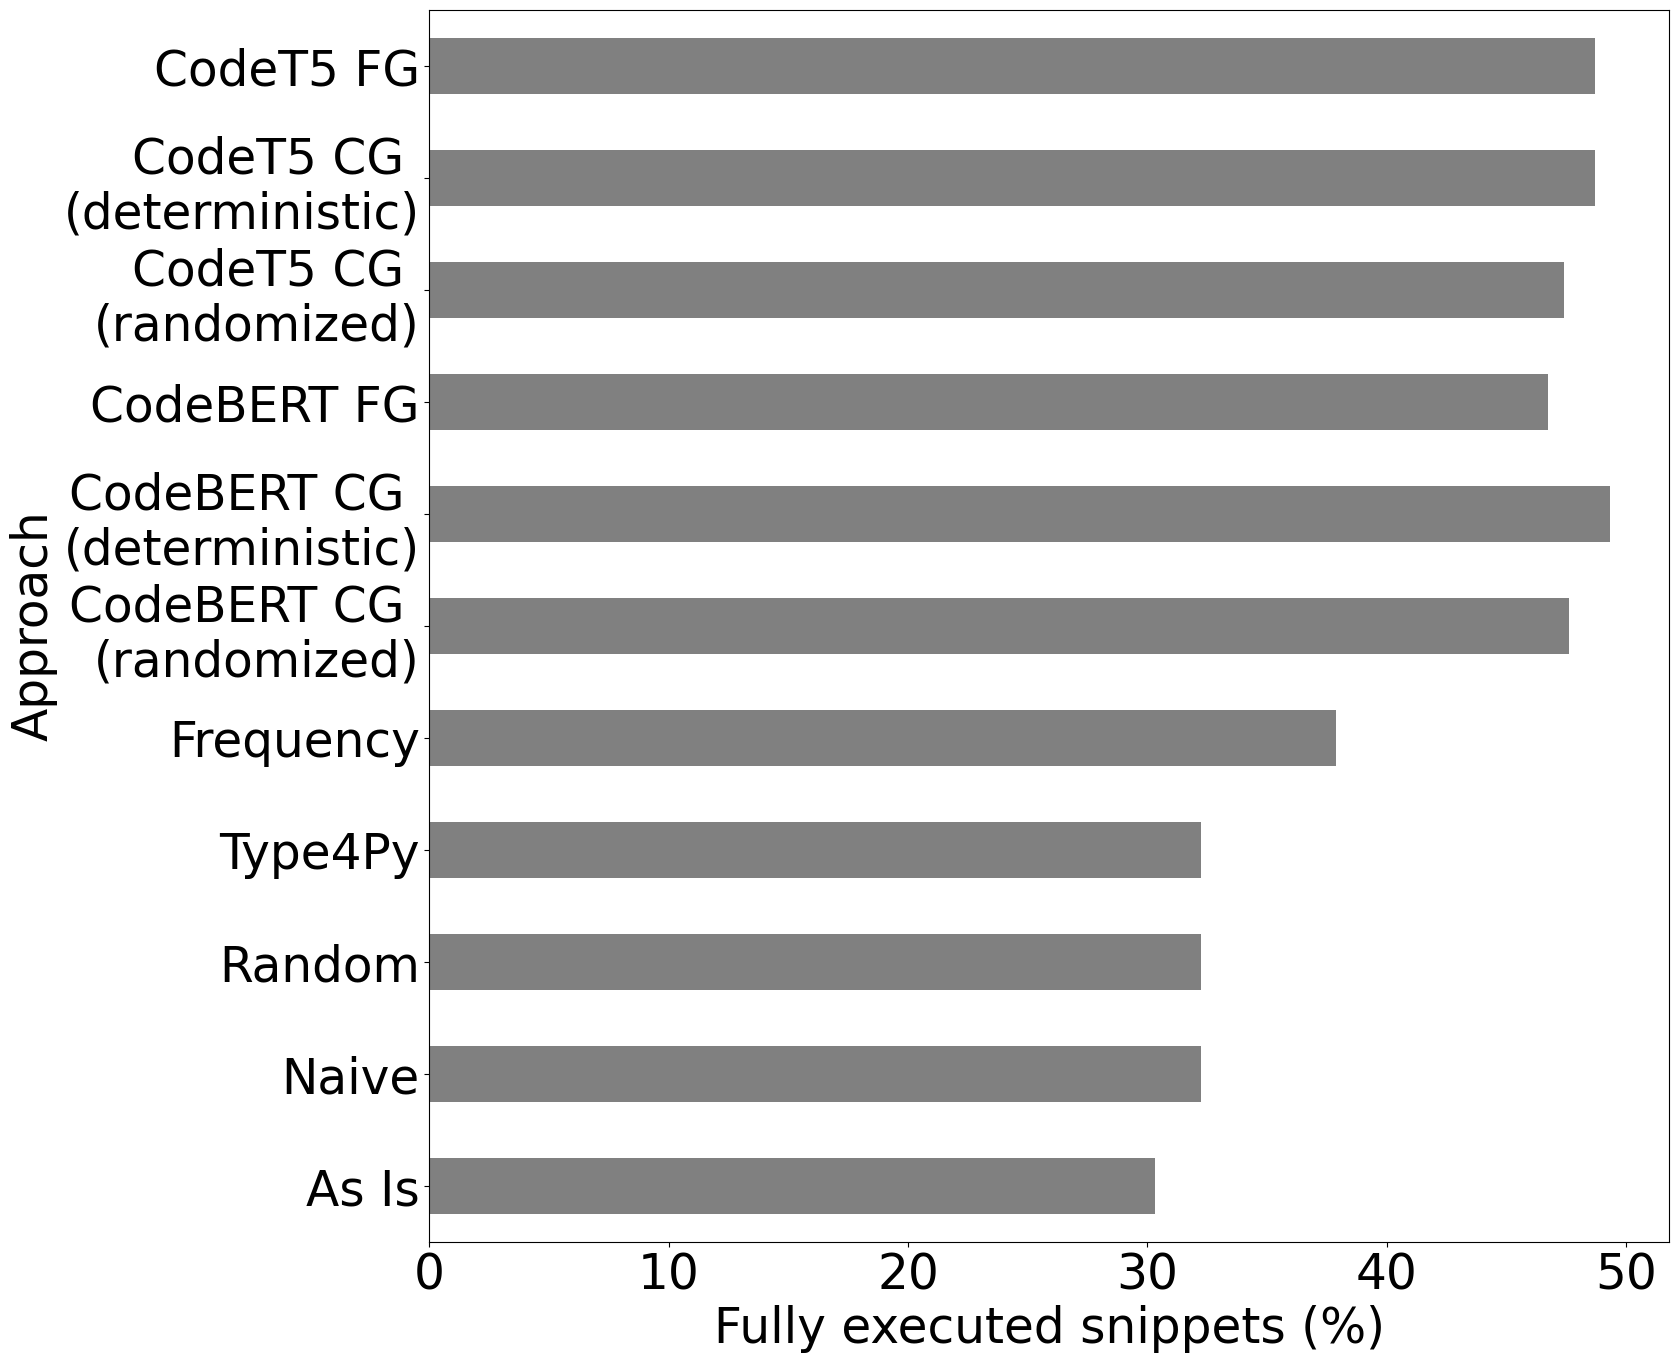

In [ ]:
so_snippets_df_grouped = so_snippets_df_grouped.sort_values(by=['order'])
so_snippets_df_grouped['completely_executed'] = [x * 100 for x in so_snippets_df_grouped['completely_executed'] / 462]

#plt.figure(figsize=(60,6))
so_snippets_df_grouped.plot.barh(x='Approach', y=['completely_executed'], color='gray', legend=None)
plt.rcParams.update({'font.size': 35})
#plt.rcParams["figure.figsize"] = (15,15)
plt.xlabel("Fully executed snippets (%)")
plt.gcf().set_size_inches(16, 16)
plt.savefig("snippets_dataset_full_LC.pdf", bbox_inches = "tight")

In [ ]:
so_snippets_df_grouped["covered_lines_percentage_"] = so_snippets_df_grouped["covered_lines"] / [so_snippets_total_lines_df['total_lines'].sum() for e in so_snippets_df_grouped["covered_lines"]]
so_snippets_df_grouped["line_execution_time_"] = so_snippets_df_grouped["execution_time"] / so_snippets_df_grouped['executed_lines']

In [ ]:
so_snippets_df_grouped = so_snippets_df.groupby(by="predictor")[["covered_lines_percentage", "completely_executed", "line_execution_time"]].mean()
so_snippets_df_grouped

,covered_lines_percentage,completely_executed,line_execution_time
predictor,,,
AsIs,0.438320,0.303030,0.005194
CodeBERT_course_grained_deterministic,0.651769,0.493506,0.126471
CodeBERT_course_grained_randomized,0.636491,0.476190,0.127200
CodeBERT_fine_grained,0.620011,0.467532,0.133762
CodeT5ValuePredictor_coarse_grained_deterministic,0.644828,0.487013,0.047380
CodeT5ValuePredictor_coarse_grained_randomized,0.631792,0.474026,0.046570
CodeT5ValuePredictor_fine_grained,0.644650,0.487013,0.047288
FrequencyValuePredictor,0.529457,0.378788,0.010785
NaiveValuePredictor,0.462524,0.322511,0.005421


In [ ]:
so_snippets_df_covered_lines_per_predictor = pd.DataFrame()
so_snippets_df_covered_lines_per_predictor['As Is'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['Naive'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['Random'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['Type4Py'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'Type4PyValuePredictor']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['Frequency'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['CodeBERT CG \n(randomized)'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'CodeBERT_course_grained_randomized']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['CodeBERT CG \n(deterministic)'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'CodeBERT_course_grained_deterministic']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['CodeBERT FG'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'CodeBERT_fine_grained']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['CodeT5 CG \n(randomized)'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['CodeT5 CG \n(deterministic)'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor['CodeT5 FG'] = [x * 100 for x in so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'].tolist()]
so_snippets_df_covered_lines_per_predictor

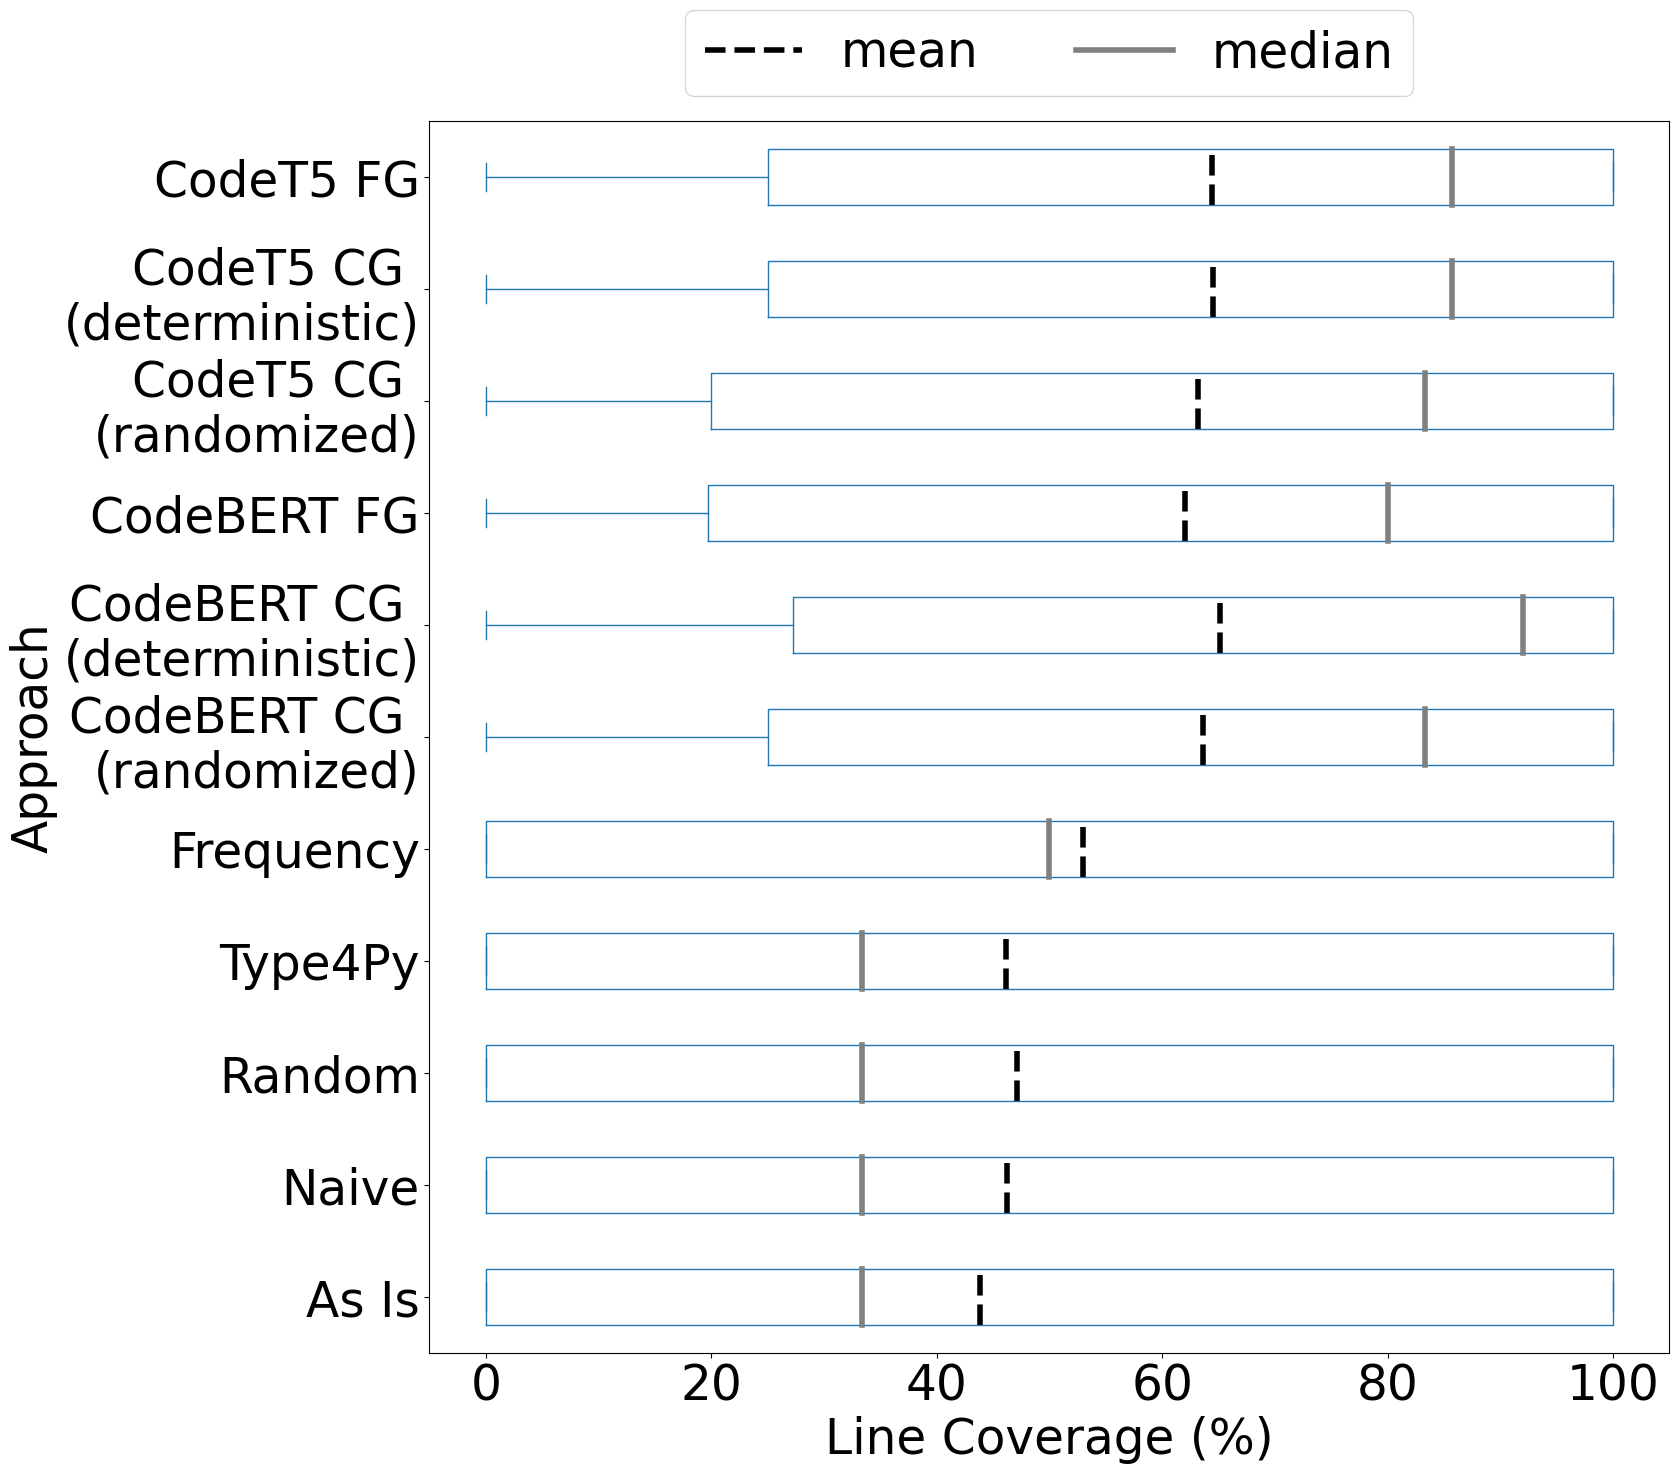

In [ ]:
meanlineprops = dict(linestyle='--', linewidth=4, color='black')
medianlineprops = dict(linestyle='-', linewidth=4, color='gray')
flierprops = dict(marker='o',markerfacecolor='gray', markersize=12,
                  linestyle='none', markeredgecolor='gray')

#plt.figure(figsize=(36,6))
so_snippets_df_covered_lines_per_predictor.plot.box(
    showmeans=True, meanprops=meanlineprops, meanline=True,
    medianprops=medianlineprops,
    vert=0,
    flierprops=flierprops);

plt.rcParams.update({'font.size': 35})
#plt.rcParams["figure.figsize"] = (15,15)
plt.xlabel("Line Coverage (%)")
plt.ylabel("Approach")
plt.plot([], [], '--', linewidth=4, color='black', label='mean')
plt.plot([], [], '-', linewidth=4, color='gray', label='median')
#plt.plot([], [], 'o', markersize=12, color='gray', label='fliers')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.11), ncol=2)
plt.gcf().set_size_inches(16, 16)
plt.savefig("snippets_dataset_LC.pdf", bbox_inches = "tight")

AsIs vs others

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

CodeT5ValuePredictor_coarse_grained_deterministic vs others

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_deterministic']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

CodeT5ValuePredictor_coarse_grained_randomized vs others

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_coarse_grained_randomized']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

CodeT5ValuePredictor_fine_grained vs others

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'AsIs']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'NaiveValuePredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'FrequencyValuePredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)

In [ ]:
stats.wilcoxon(so_snippets_df[so_snippets_df['predictor'] == 'RandomPredictor']['covered_lines_percentage'], so_snippets_df[so_snippets_df['predictor'] == 'CodeT5ValuePredictor_fine_grained']['covered_lines_percentage'])

WilcoxonResult(statistic=nan, pvalue=nan)